Part 1 – Amortization models (10 pt)

1.The group is asked to model how lent money is paid off. With respect to amortization there are several methods:

Italian (1.5 pt)

French (1.5 pt)

American (1.5 pt)

Geometric (1.5 pt)

The code has to:

1) Contain the models, allowing the user to choose the method (1pt)

2) Visualize the comparison across methods (1pt)

3) Save an excel/csv file where, in each sheet you show the results for each method (0.5 pt)

In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [14]:
'''Italian Method: Pay the same loan amount each time, interest gets smaller.'''
'''This method is commonly used in China（provided by China Bnak）'''
def italian_method(loan, rate, periods, period_type):
    principal = loan / periods
    balance = loan
    data = []
    for i in range(1, periods + 1):
        interest = balance * rate
        payment = principal + interest
        balance -= principal
        data.append([i, payment, principal, interest, balance])
    return pd.DataFrame(data, columns=[f'Period ({period_type})', 'Payment', 'Principal', 'Interest', 'Balance']).round(4)

In [15]:
'''French Method: Fixed total payment with varying interest and principal portions.'''
'''This method is commonly used in China（provided by China Bnak）'''
def french_method(loan, rate, periods, period_type):
    payment = loan * (rate * (1 + rate) ** periods) / ((1 + rate) ** periods - 1)
    balance = loan
    data = []
    for i in range(1, periods + 1):
        interest = balance * rate
        principal = payment - interest
        balance -= principal
        data.append([i, payment, principal, interest, balance])
    return pd.DataFrame(data, columns=[f'Period ({period_type})', 'Payment', 'Principal', 'Interest', 'Balance']).round(4)

In [16]:
'''American Method: Pay only interest first, then all the loan at once.'''
'''This method is commonly used in China（provided by China Bnak）'''
def american_method(loan, rate, periods, period_type):
    balance = loan
    interest_only_payment = loan * rate
    data = []
    for i in range(1, periods):
        data.append([i, interest_only_payment, 0, interest_only_payment, loan])
    data.append([periods, loan + interest_only_payment, loan, interest_only_payment, 0])
    return pd.DataFrame(data, columns=[f'Period ({period_type})', 'Payment', 'Principal', 'Interest', 'Balance']).round(4)

In [17]:
'''Geometric Method: Payments go up or down at a steady rate.'''
def geometric_method(loan, rate, periods, factor, period_type):
    factor=factor/100
    if period_type == 'monthly':
      factor = (1 + factor) ** (1 / 12) - 1
    elif period_type == 'biannual':
      factor = (1 + factor) ** (1 / 2) - 1
    elif period_type == 'quarterly':
      factor = (1 + factor) ** (1 / 4) - 1
    elif period_type == 'four months':
      factor = (1 + factor) ** (1 / 3) - 1
    elif period_type == 'annual':
        factor = factor
    principal = loan
    q = 1 + factor
    payment = (loan * (rate - factor)) / (1 - (q / (1 + rate)) ** periods)
    balance = principal
    data = []
    for i in range(1, periods + 1):
      if i > 1:
        payment *= q
      interest = balance * rate
      principal = payment - interest
      if i == periods:
          principal = balance
          payment = principal + interest
          balance = 0
      else:
          balance -= principal
      data.append([i, payment, principal, interest, balance])
    return pd.DataFrame(data, columns=[f'Period ({period_type})', 'Payment', 'Principal', 'Interest', 'Balance']).round(4)

In [18]:
'''Maturity Lump-Sum Repayment: Pays the entire interest and principal balance in a single lump sum at maturity.'''
'''This method is is commonly used in China（provided by China Bnak）'''
def maturity_lump_sum(loan, rate, periods, period_type='Period'):
    total_interest = loan * rate * periods
    total_payment = loan + total_interest
    data = []
    for i in range(1, periods):
        principal=0
        payment=0
        interest=0
        balance=loan
        data.append([i, payment, principal, interest, balance])
    data.append([periods , total_payment, loan, total_interest, 0])
    return pd.DataFrame(data, columns=[f'Period ({period_type})', 'Payment', 'Principal', 'Interest', 'Balance']).round(4)

In [19]:
'''Visualization of the five methond seperately with bar charts'''
def visualize_methods_as_bar_charts(methods, loan, rate, periods, period_type):
    colors = ['teal', 'gold', 'blue', 'green', 'orange']
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Amortization Breakdown by Method: Illustrated with Bar Charts', fontsize=16, y=0.96)
    for i, (method_name, method_func) in enumerate(methods.items()):
        df = method_func(loan, rate, periods)
        df_filtered = df.dropna(subset=[f'Period ({period_type})']).query(f"`Period ({period_type})` != 'Total'")
        periods_int = df_filtered[f'Period ({period_type})'].astype(int)
        principal = df_filtered['Principal']
        interest = df_filtered['Interest']
        row = i // 3
        col = i % 3
        ax = axs[row, col]
        ax.bar(periods_int, principal, label='Principal', color='teal', width=0.5)
        ax.bar(periods_int, interest, bottom=principal, label='Interest', color='gold', width=0.5)
        ax.set_xlabel('Period')
        ax.set_ylabel('Amount')
        ax.set_title(f'{method_name} Method')
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.6)
    for j in range(len(methods), 6):
        axs[j // 3, j % 3].set_visible(False)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [20]:
'''Visualization of the five methond seperately with line charts'''
#This line chart is not shown in our presentations for space limit
def seperate_visualize(methods, loan, rate, periods):
    colors = {
        'Italian': 'blue',
        'French': 'green',
        'American': 'orange',
        'Geometric': 'purple',
        'Lump-sum': 'red'
    }
    num_methods = len(methods)
    rows=2
    cols=3
    fig, axs = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Amortization Breakdown by Method: Illustrated with Line Charts', fontsize=16, y=0.9)
    fig.tight_layout(pad=6.0)
    for i, (name, func) in enumerate(methods.items()):
        if i >= rows * cols:
            break
        df = func(loan, rate, periods)
        df_filtered = df[df['Balance'] != '---']
        df_filtered['Period'] = df_filtered.index + 1
        df_filtered['Cumulative Interest'] = df_filtered['Interest'].cumsum()
        df_filtered['Cumulative Principal'] = df_filtered['Principal'].cumsum()
        row = i // cols
        col = i % cols
        ax = axs[row, col]
        # Plot the balance change curve
        ax.plot(df_filtered['Period'], df_filtered['Balance'], label=f"{name} - Balance", color=colors[name], linewidth=2)
        # Accumulated interest curve
        ax.plot(df_filtered['Period'], df_filtered['Cumulative Interest'], label=f"{name} - Cumulative Interest",
                 color=colors[name], linestyle="--", linewidth=2)
        # Cumulative principal
        ax.plot(df_filtered['Period'], df_filtered['Cumulative Principal'], label=f"{name} - Principal Paid",
                 color=colors[name], linestyle=":", linewidth=2)
        ax.set_xlabel("Period")
        ax.set_ylabel("Amount ($)")
        ax.set_title(f"{name} Method Amortization")
        ax.grid(axis="both", linestyle="--", alpha=0.6)
        ax.legend(loc="upper right", fontsize=10)
    for i in range(num_methods, rows * cols):
        row = i // cols
        col = i % cols
        axs[row, col].axis('off')

    plt.show()

In [21]:
'''Visualization of the balance, interest paid, principle paid'''
def visualize_amortization(methods, loan, rate, periods):
    colors = {
        'Italian': 'blue',
        'French': 'green',
        'American': 'orange',
        'Geometric': 'purple',
        'Lump-sum': 'red'
    }
    fig, axs = plt.subplots(2, 2, figsize=(18, 15))
    axs = axs.flatten()
    for name, func in methods.items():
        df = func(loan, rate, periods)
        df_filtered = df[df['Balance'] != '---']
        df_filtered['Period'] = df_filtered.index + 1
        df_filtered['Cumulative Interest'] = df_filtered['Interest'].cumsum()
        df_filtered['Cumulative Principal'] = df_filtered['Principal'].cumsum()
        # Balance
        axs[0].plot(df_filtered['Period'], df_filtered['Balance'], label=f"{name} - Balance", color=colors[name], linewidth=2)
        axs[0].set_title("Balance Chart", fontsize=16)
        axs[0].set_xlabel("Period (Payment Number)", fontsize=16)
        axs[0].set_ylabel("Balance", fontsize=16)
        axs[0].tick_params(axis='both', labelsize=14)
        axs[0].legend(loc="upper right", fontsize=10)
        # Cumulative Interest
        axs[1].plot(df_filtered['Period'], df_filtered['Cumulative Interest'], label=f"{name} - Cumulative Interest", color=colors[name], linewidth=2)
        axs[1].set_title("Cumulative Interest Chart", fontsize=16)
        axs[1].set_xlabel("Period (Payment Number)", fontsize=16)
        axs[1].set_ylabel("Cumulative Interest", fontsize=16)
        axs[1].tick_params(axis='both', labelsize=14)
        axs[1].legend(loc="upper right", fontsize=10)
        # Cumulative Principal
        axs[2].plot(df_filtered['Period'], df_filtered['Cumulative Principal'], label=f"{name} - Principal Paid", color=colors[name], linewidth=2)
        axs[2].set_title("Principal Paid Chart", fontsize=16)
        axs[2].set_xlabel("Period (Payment Number)", fontsize=16)
        axs[2].set_ylabel("Principal Paid", fontsize=16)
        axs[2].tick_params(axis='both', labelsize=14)
        axs[2].legend(loc="upper right", fontsize=10)
        # Visualization to show the comparation across different methods in the fourth subplot
        axs[3].plot(df_filtered['Period'], df_filtered['Balance'], label=f"{name} - Balance", color=colors[name], linewidth=2)
        axs[3].plot(df_filtered['Period'], df_filtered['Cumulative Interest'], label=f"{name} - Cumulative Interest", color=colors[name], linestyle="--", linewidth=2)
        axs[3].plot(df_filtered['Period'], df_filtered['Cumulative Principal'], label=f"{name} - Principal Paid", color=colors[name], linestyle=":", linewidth=2)
        axs[3].set_title("Loan Amortization Across Different Methods", fontsize=16)
        axs[3].set_xlabel("Period (Payment Number)", fontsize=16)
        axs[3].set_ylabel("Amount ($)", fontsize=16)
        axs[3].tick_params(axis='both', labelsize=14)
        axs[3].legend(loc="upper right", fontsize=10)
    for ax in axs:
        ax.grid(axis="both", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

In [22]:
'''Add total rows in the final printed table'''
def create_totals_df(total_payment, total_principal, total_interest):
    totals_df = pd.DataFrame({
        'Description': ['Total Payment', 'Total Principal', 'Total Interest'],
        'Value': [total_payment, total_principal, total_interest]
    })
    return totals_df

In [23]:
'''Convert the table to excel'''
def export_to_excel(methods, loan, rate, periods, filename='amortization_methods.xlsx'):
    with pd.ExcelWriter(filename) as writer:
        for name, func in methods.items():
            df = func(loan, rate, periods)
            df.to_excel(writer, sheet_name=name, index=False)
            total_payment = df['Payment'].sum()
            total_principal = df['Principal'].sum()
            total_interest = df['Interest'].sum()
            totals_df = create_totals_df(total_payment, total_principal, total_interest)
            startrow = len(df) + 1
            totals_df.to_excel(writer, sheet_name=name, startrow=startrow, index=False, header=False)

Enter loan amount: 1000000
Enter annual interest rate (as a decimal): 0.05
Please enter the payment frequency (annual, biannual, four months, quarterly, monthly): annual
Please enter the amortization term (years): 10
Choose a method (Italian, French, American, Geometric, Lump-sum): Italian
Amortization Table:
   Period (annual)   Payment  Principal  Interest   Balance
0                1  150000.0   100000.0   50000.0  900000.0
1                2  145000.0   100000.0   45000.0  800000.0
2                3  140000.0   100000.0   40000.0  700000.0
3                4  135000.0   100000.0   35000.0  600000.0
4                5  130000.0   100000.0   30000.0  500000.0
5                6  125000.0   100000.0   25000.0  400000.0
6                7  120000.0   100000.0   20000.0  300000.0
7                8  115000.0   100000.0   15000.0  200000.0
8                9  110000.0   100000.0   10000.0  100000.0
9               10  105000.0   100000.0    5000.0       0.0

Totals Table:
       Descrip

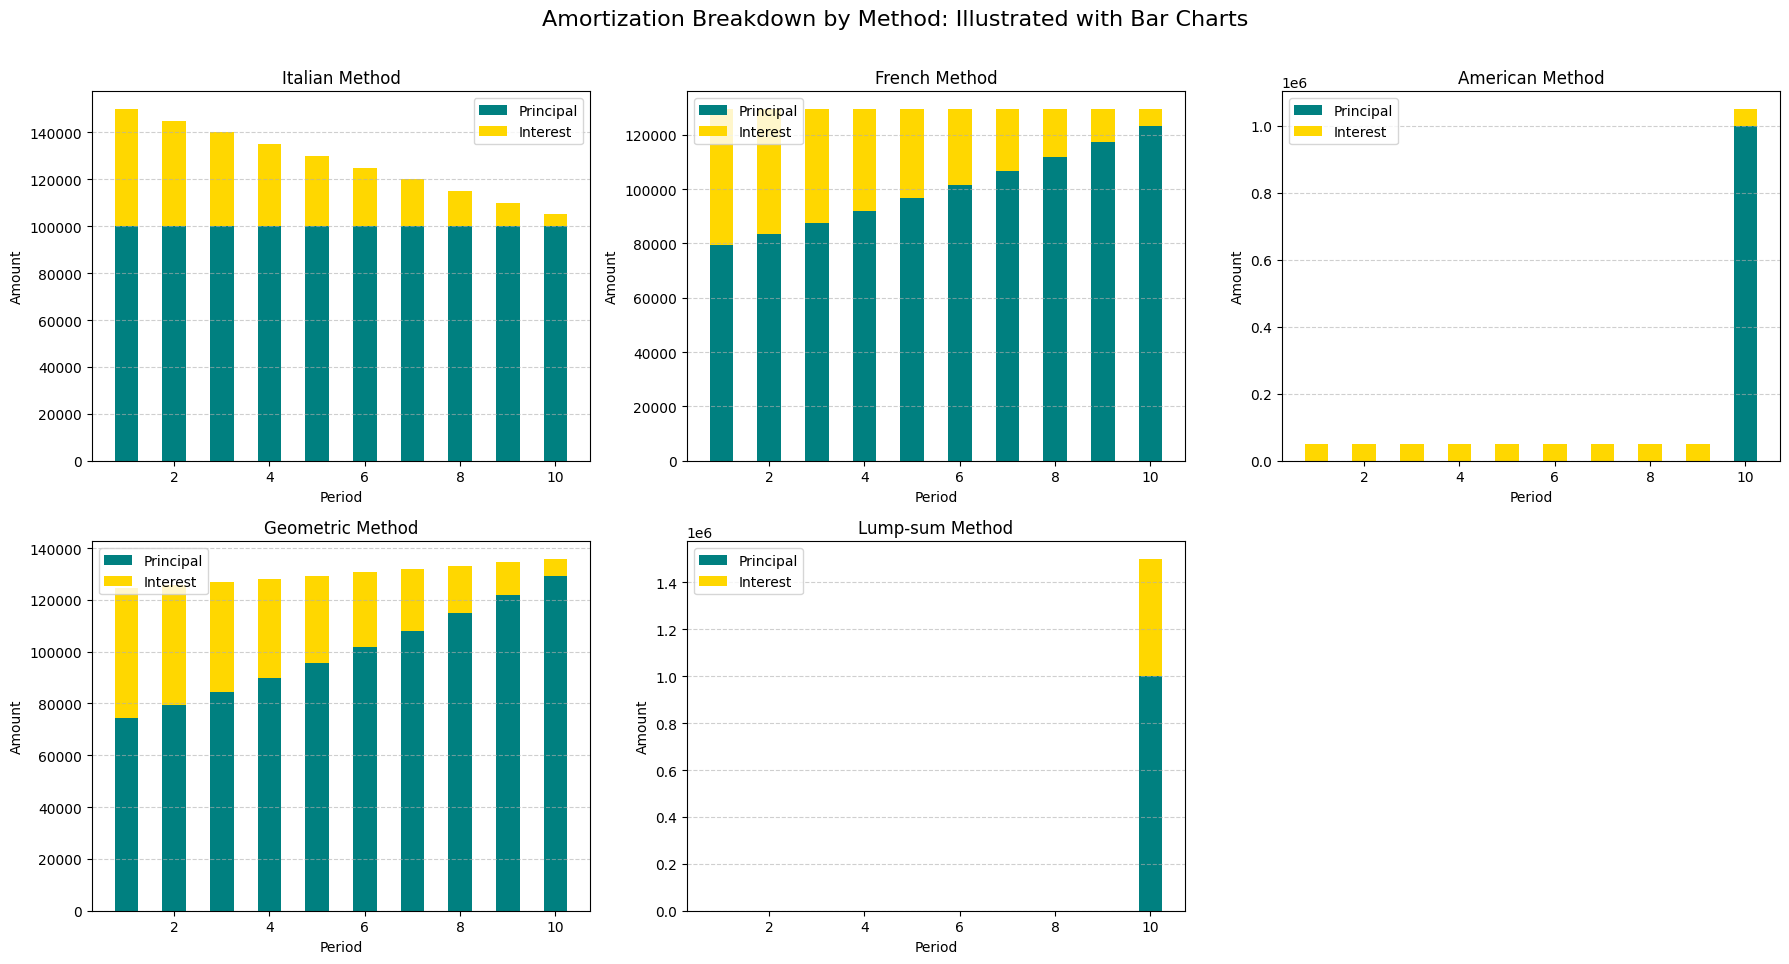

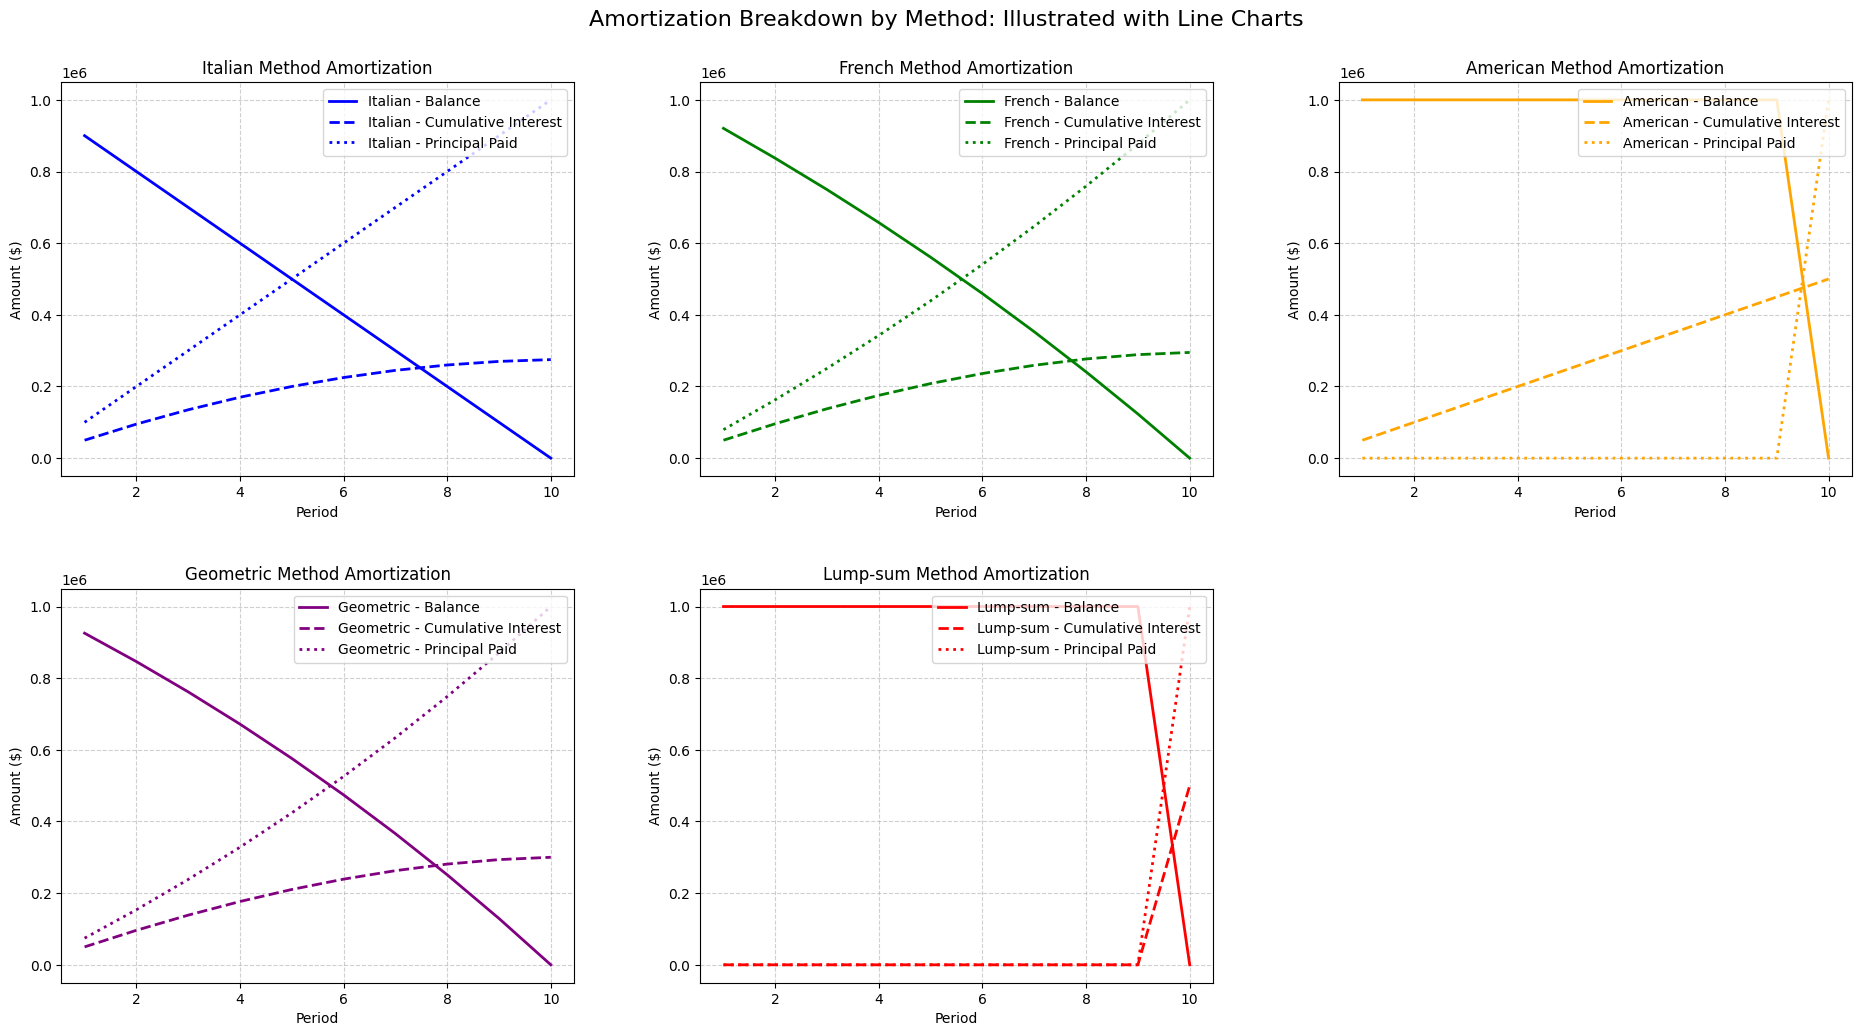

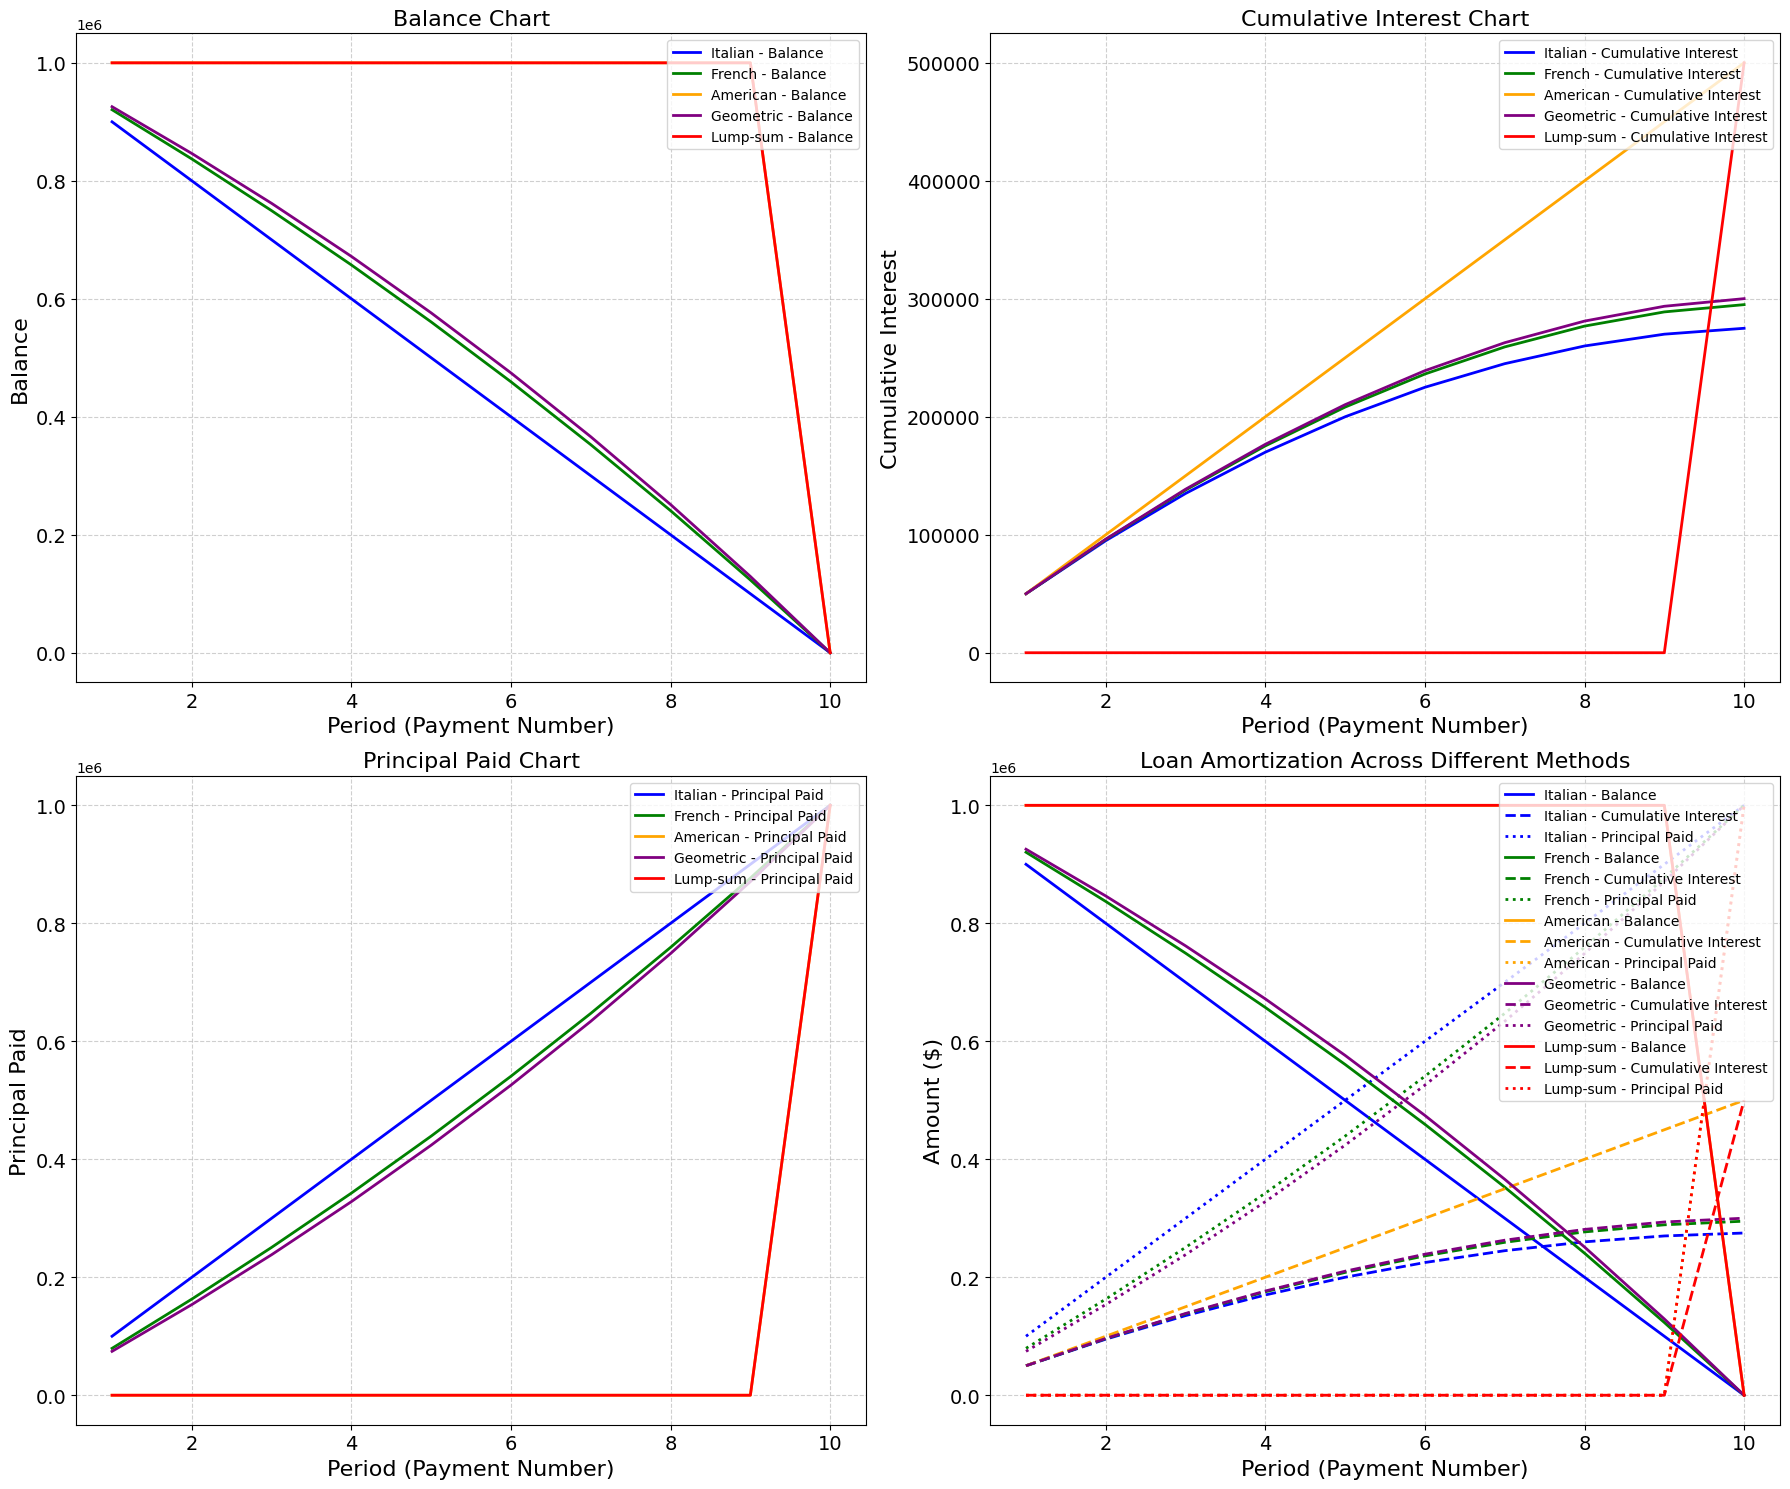

In [24]:
loan = float(input("Enter loan amount: "))
rate = float(input("Enter annual interest rate (as a decimal): "))
period_type = input("Please enter the payment frequency (annual, biannual, four months, quarterly, monthly): ").lower()
periods = int(input("Please enter the amortization term (years): "))
method_choice = input("Choose a method (Italian, French, American, Geometric, Lump-sum): ")
factor=0.98
# Adjust the interest rate and number of periods based on the payment frequency
if  period_type == 'biannual':
    rate = rate / 2
    periods = periods * 2
elif period_type == 'four months':
    rate = rate / 3
    periods = periods * 3
elif period_type == 'quarterly':
    rate = rate / 4
    periods = periods * 4
elif period_type == 'monthly':
    rate = rate / 12
    periods = periods * 12
# The methods people can choose
methods = {
    'Italian': lambda loan, rate, periods: italian_method(loan, rate, periods, period_type),
    'French': lambda loan, rate, periods: french_method(loan, rate, periods, period_type),
    'American': lambda loan, rate, periods: american_method(loan, rate, periods, period_type),
    'Geometric': lambda loan, rate, periods: geometric_method(loan, rate, periods, 0.98, period_type),
    'Lump-sum': lambda loan, rate, periods: maturity_lump_sum(loan, rate, periods, period_type)
}
# Select the chosen repayment method
selected_method = methods[method_choice]
# Geometric method is a little bit different with others, so if the chosen method is the geometric method, prompt for the factor
if method_choice == "Geometric":
    factor = float(input("Enter the factor of the geometric method(This value cannot be greater than one plus the interest rate): "))
    df = geometric_method(loan,rate,periods,factor,period_type)
else:
    df = selected_method(loan, rate, periods)
#Print the amortization table
print("Amortization Table:")
print(df)
export_to_excel(methods, loan, rate, periods)
#Print the total amount table
total_payment = df['Payment'].sum()
total_principal = df['Principal'].sum()
total_interest = df['Interest'].sum()
totals_df = create_totals_df(total_payment, total_principal, total_interest)
totals_df_transposed = totals_df.T
print("\nTotals Table:")
print(totals_df)
#Visualize the result
visualize_methods_as_bar_charts(methods, loan, rate, periods, period_type)
seperate_visualize(methods, loan, rate, periods)
visualize_amortization(methods, loan, rate, periods)
export_to_excel(methods, loan, rate, periods)